In [1]:
import numpy as np
import pandas as pd
import warnings
import itertools

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm 
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('data.csv')
df.columns=["Date","B","R"]
df.head()

,Date,B,R
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58


In [3]:
df.tail()

,Date,B,R
1456,12/27/2013,NaN,48.77
1457,12/28/2013,NaN,26.33
1458,12/29/2013,NaN,11.57
1459,12/30/2013,NaN,36.00
1460,12/31/2013,NaN,29.53


In [4]:
df.shape

(1461, 3)

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,B,R
0,2010-01-01,39.45,51.21
1,2010-01-02,46.53,49.67
2,2010-01-03,37.03,44.08
3,2010-01-04,48.44,49.04
4,2010-01-05,39.79,40.58


In [7]:
df.set_index('Date', inplace = True)

In [8]:
df.head()

,B,R
Date,,
2010-01-01,39.45,51.21
2010-01-02,46.53,49.67
2010-01-03,37.03,44.08
2010-01-04,48.44,49.04
2010-01-05,39.79,40.58


In [9]:
df.isnull().sum()

B    269
R    243
dtype: int64

In [10]:
df.tail()

,B,R
Date,,
2013-12-27,NaN,48.77
2013-12-28,NaN,26.33
2013-12-29,NaN,11.57
2013-12-30,NaN,36.00
2013-12-31,NaN,29.53


In [11]:
#df = df.fillna(df.bfill())

In [12]:
df.tail()

,B,R
Date,,
2013-12-27,NaN,48.77
2013-12-28,NaN,26.33
2013-12-29,NaN,11.57
2013-12-30,NaN,36.00
2013-12-31,NaN,29.53


In [13]:
df = df.dropna()

In [14]:
df.tail()

,B,R
Date,,
2013-11-28,19.05,11.96
2013-11-29,22.64,10.40
2013-11-30,21.74,19.09
2013-12-01,22.87,20.58
2013-12-02,30.90,6.83


In [15]:
df.isnull().sum()

B    0
R    0
dtype: int64

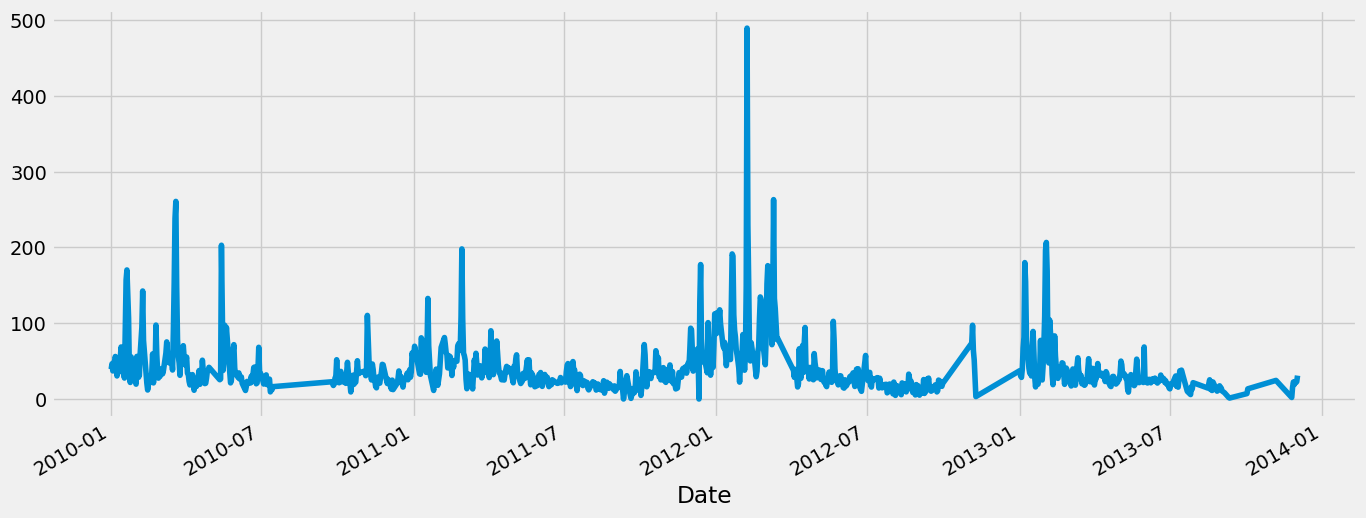

In [16]:
df['B'].plot(figsize=(15, 6))
plt.show()

In [17]:
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 0, 2, 12)
SARIMAX: (0, 0, 2) X (0, 0, 3, 12)
SARIMAX: (0, 0, 2) X (0, 1, 0, 12)


In [18]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [19]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [ ]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df['B'],
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = model.fit()
            print(f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11161.649246468016
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10714.196018486835
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:10451.852366623436
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:10193.21442569074
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10628.535299197381
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10053.847179629562
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:9934.432307523739
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:9809.839155547088
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10448.171742921273
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10163.676050560316
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:10051.721454886007
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:9903.288489615286
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10237.12145526908
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10055.81658378494
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:9936.397561596608
ARIMA(0, 0, 0)x(1, 1, 3, 12)12 - AIC:9809.886434177446
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:10153.697910583796
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:10059.243947348572


In [ ]:
Best_model = sm.tsa.statespace.SARIMAX(df['B'],
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
results = model.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = df['2013-09-01':]
y_truth['pre_B'] = y_forecasted
y_truth

In [ ]:
ax = df['2010-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='one-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [ ]:
mse = ((y_truth.B - y_truth.pre_B)**2).mean()
print('Mea Squraed Error = ', mse)

In [ ]:
rmse = np.sqrt(mse)
print('Root Mean Squraed Error = ', rmse)

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = df['2010-09-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-01-01'), df.index[-1],
                alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [ ]:
pred_uc = results.get_forecast(steps= 60)

pred_ci = pred_uc.conf_int()

In [ ]:
future_df = pd.DataFrame(pred_uc.predicted_mean)
future_df.columns = ['Future_pred']
future_df

In [ ]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()